In [ ]:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
import pandas as pd

data_path = '/content/drive/MyDrive/creditcard.csv'
df = pd.read_csv(data_path)


In [ ]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_Time,scaled_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-1.996583,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-1.996583,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1.996562,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-1.996562,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-1.996541,-0.073403


In [ ]:
df.info()
#All variables are non-null and numerical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.groupby(df.Class).describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16  
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87  

[2 rows x 240 columns]

Let's compare the distribution of variables converted to pca by dividing them into fraudulent and non-fraudulent transactions

In [ ]:
X = df.drop(['Time','Amount','Class'],axis=1)
y = df['Class']

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud / 1: Fraud)')

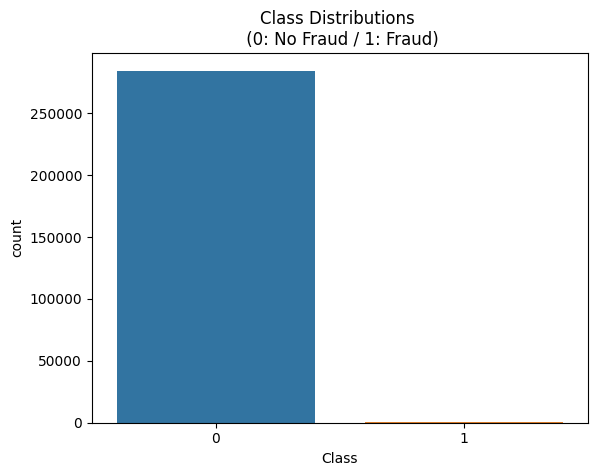

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title('Class Distributions \n (0: No Fraud / 1: Fraud)')

Investigate the distribution of the 'time' and 'amount' 

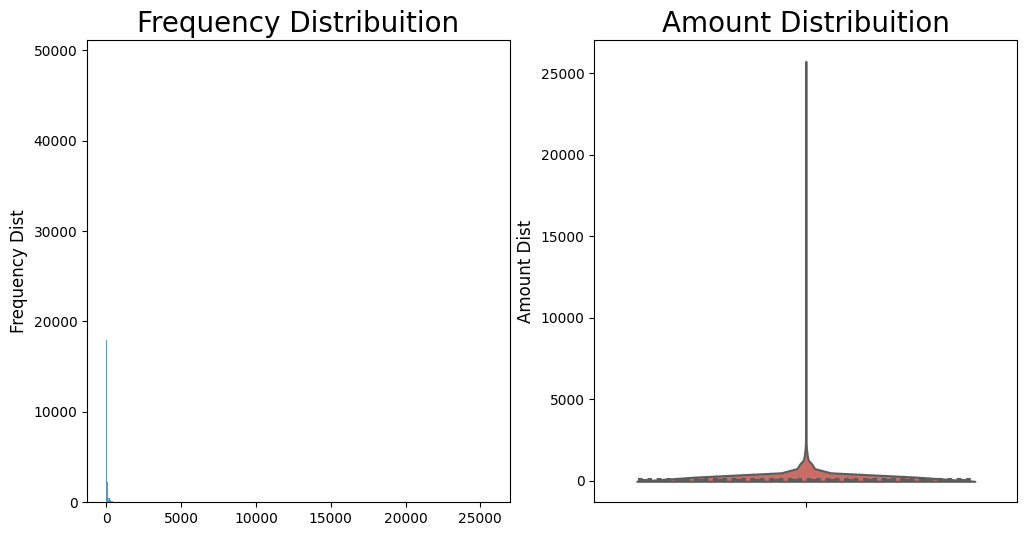

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.histplot(df["Amount"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="Amount", data=df, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

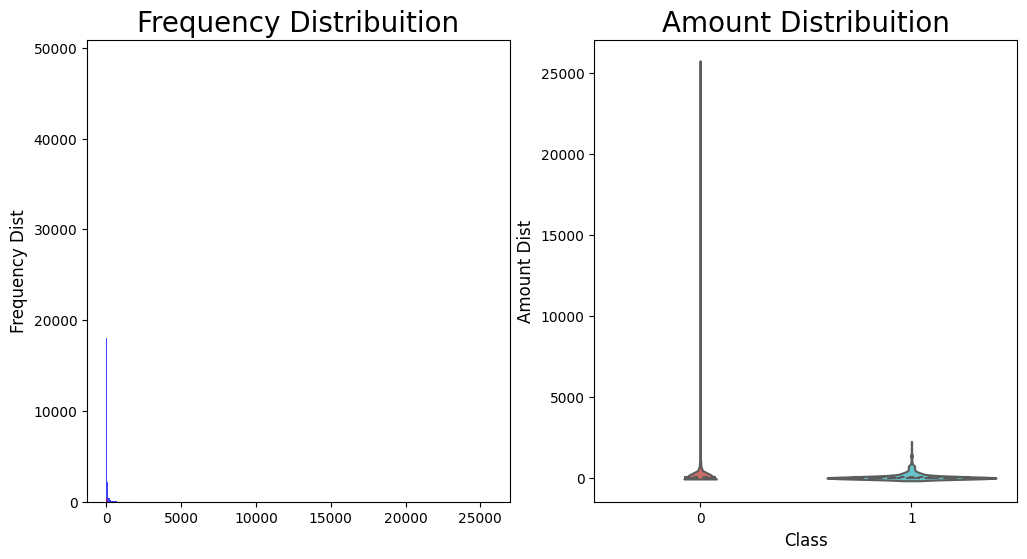

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.histplot(df[df["Class"] == 0]["Amount"], color="b")
g = sns.histplot(df[df["Class"] == 1]["Amount"], color="r")
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(x="Class", y="Amount", data=df, 
               inner="quartile", palette="hls")
g1.set_xlabel("Class", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

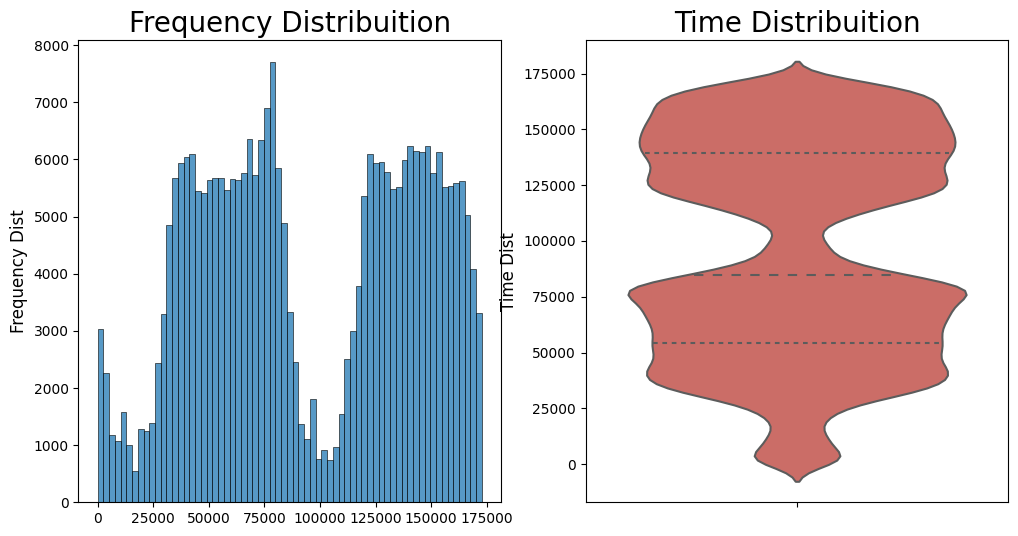

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.histplot(df["Time"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="Time", data=df, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Time Dist", fontsize=12)
g1.set_title("Time Distribuition", fontsize=20)

plt.show()

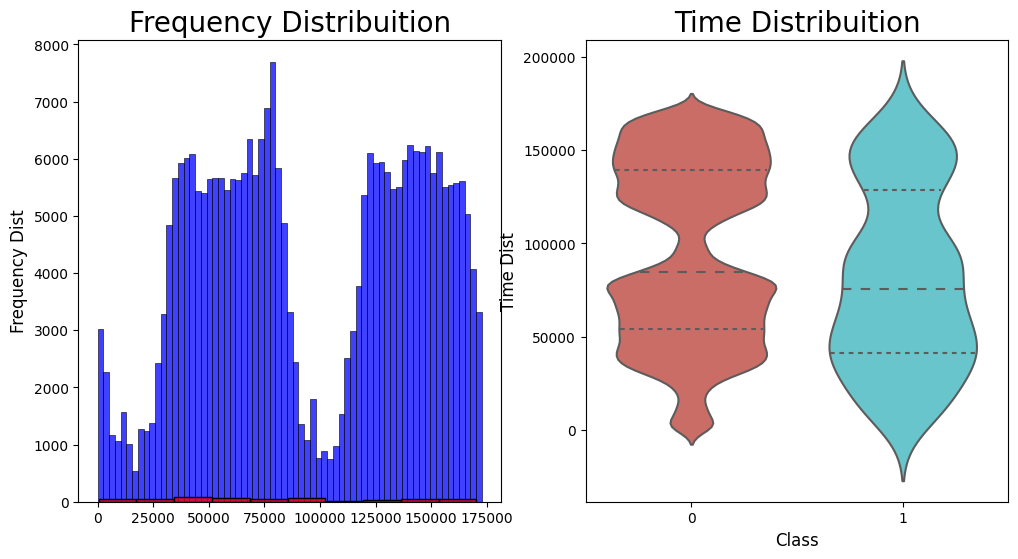

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.histplot(df[df["Class"] == 0]["Time"], color="b")
g = sns.histplot(df[df["Class"] == 1]["Time"], color="r")
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(x="Class", y="Time", data=df, 
               inner="quartile", palette="hls")
g1.set_xlabel("Class", fontsize=12)
g1.set_ylabel("Time Dist", fontsize=12)
g1.set_title("Time Distribuition", fontsize=20)

plt.show()

I found that in the case of legitimate transactions, they tended to follow a normal distribution with lunchtime and afternoon as the average, whereas in the case of fraudulent transactions, there was a higher possibility of them occurring outside of business hours. In particular, many transactions were attempted late at night or early in the morning. Additionally, I observed that the transaction amounts for fraud were generally small. 

In [ ]:
import numpy as np 

# Calculate the variance of each feature
variances = np.var(X, axis=0)
contributions = variances / np.sum(variances)
cumulative_variance_ratio = np.cumsum(contributions)



In [ ]:
# Contribution rate output for each feature
contributions

V1     0.124838
V2     0.088729
V3     0.074809
V4     0.065231
V5     0.061990
V6     0.057756
V7     0.049799
V8     0.046417
V9     0.039275
V10    0.038579
V11    0.033901
V12    0.032488
V13    0.032233
V14    0.029901
V15    0.027262
V16    0.024984
V17    0.023473
V18    0.022860
V19    0.021563
V20    0.019339
V21    0.017556
V22    0.017137
V23    0.012689
V24    0.011936
V25    0.008842
V26    0.007567
V27    0.005301
V28    0.003545
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


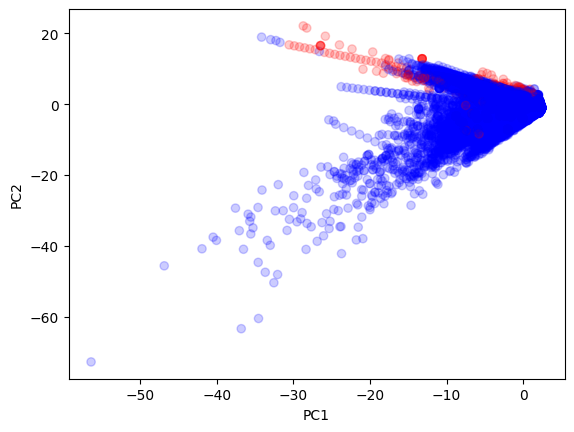

In [ ]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=np.where(y==1, 'red', 'blue' ), alpha=0.2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

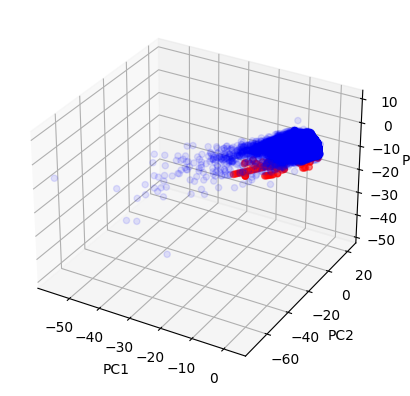

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.loc[y==0, 'V1'], X.loc[y==0, 'V2'], X.loc[y==0, 'V3'], c='blue', alpha=0.1, label='y=0')
ax.scatter(X.loc[y==1, 'V1'], X.loc[y==1, 'V2'], X.loc[y==1, 'V3'], c='red', alpha=0.5, label='y=1')


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

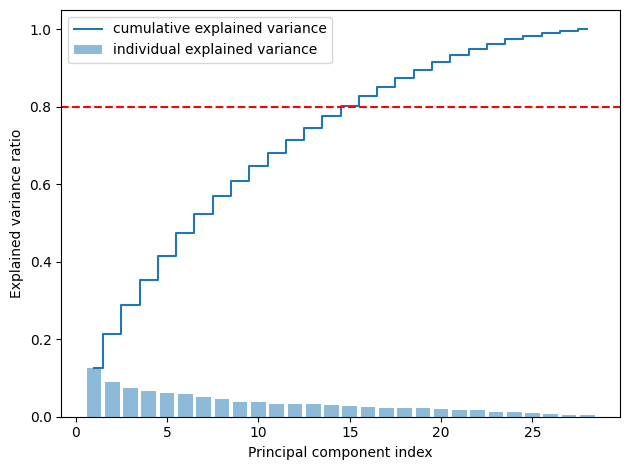

In [ ]:
# Total and explained variance

plt.bar(range(1, 29), contributions, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 29), cumulative_variance_ratio, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

# Add line for 80% explained variance
plt.axhline(y=0.8, linestyle='--', color='red', label='80% explained variance')

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["scaled_Time", "scaled_Amount"]] = scaler.fit_transform(df[["Time", "Amount"]])

In [ ]:
X= df.drop(['Time','Amount','Class'], axis=1)

In [ ]:
X_copy = X.copy()

<Axes: >

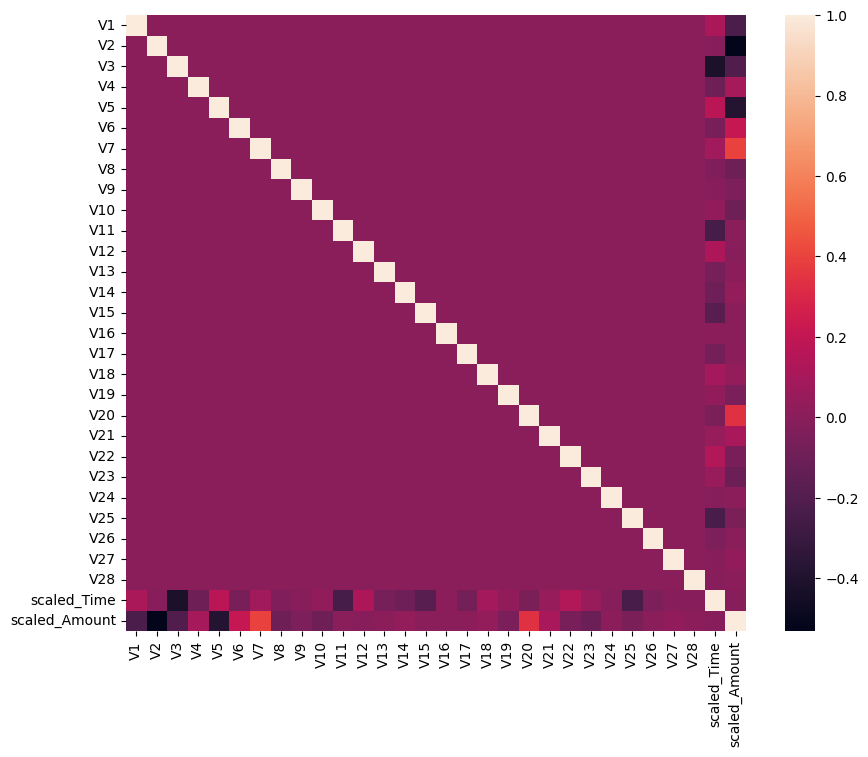

In [ ]:
plt.figure(figsize=(10, 8)) 
plt.figure(1)
corr = X.corr()
sns.heatmap(corr)

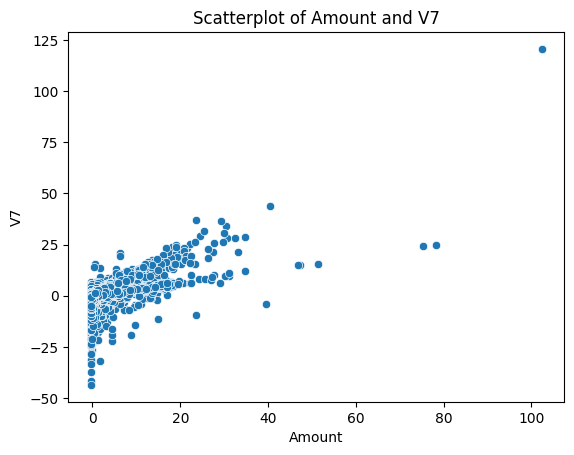

Correlation coefficient between Amount and V7: 0.3973112781816902


In [ ]:
sns.scatterplot(x='scaled_Amount', y='V7', data=X)
plt.title('Scatterplot of Amount and V7')
plt.xlabel('Amount')
plt.ylabel('V7')
plt.show()

correlation_coefficient = X['scaled_Amount'].corr(X['V7'])
print(f"Correlation coefficient between Amount and V7: {correlation_coefficient}")

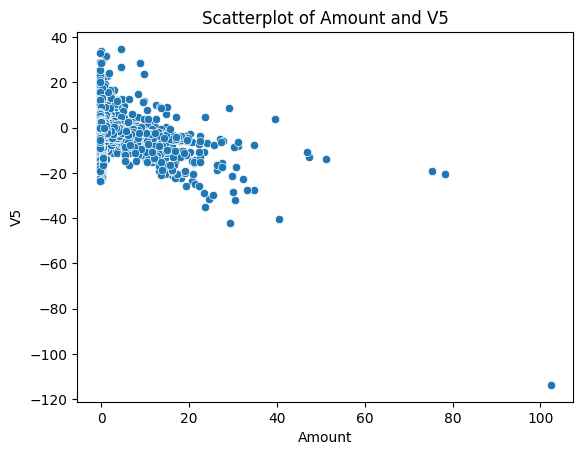

Correlation coefficient between Amount and V5: -0.3863562561630607


In [ ]:
sns.scatterplot(x='scaled_Amount', y='V5', data=X)
plt.title('Scatterplot of Amount and V5')
plt.xlabel('Amount')
plt.ylabel('V5')
plt.show()

correlation_coefficient = X['scaled_Amount'].corr(X['V5'])
print(f"Correlation coefficient between Amount and V5: {correlation_coefficient}")

**Feature selection**

[feature selection] 

1.principal component analysis (PCA) based on main component contribution

2.analysis of variance (ANOVA) F-test

3.distribution-based feature selection

4.mutual information-based feature selection.


In [ ]:
#X_1 (pca feature selection)
# select the main components with high explainable variance to maintain 80% explainable variance and reduce dimensions. The amount and time variables with little linear relationship with the main component variable were added after scaling. (15+2)
X_1 = X.iloc[:, :15].join(X.iloc[:, -2:])

In [ ]:
#X_2 (F-test Feature Selection)
#Rank the features by their F-test scores and select the top 17 features

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=17) 
fit= selector.fit_transform(X_copy, y)
X_selected = X_copy.columns[selector.get_support()]

print(X_selected)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21'],
      dtype='object')


In [ ]:
X_2 = X_copy[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21']]

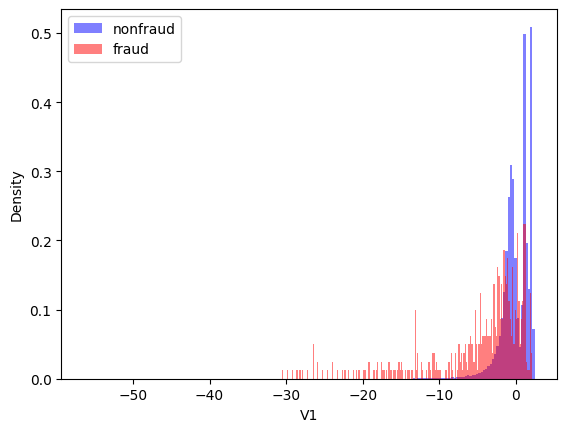

<ipython-input-37-e06e517aad1f>:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  overlap_size = quad(lambda x: np.minimum(np.interp(x, bins0[:-1], density0), np.interp(x, bins1[:-1], density1)), -np.inf, np.inf, limit=200)[0]
<ipython-input-37-e06e517aad1f>:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  nonfraud_size = quad(lambda x: np.interp(x, bins0[:-1], density0), -np.inf, np.inf)[0]
<ipython-input-37-e06e517aad1f>:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  fraud_size = quad(lambda x: np.interp(x, bins1[:-1], density1), -np.inf, np.inf)[0]


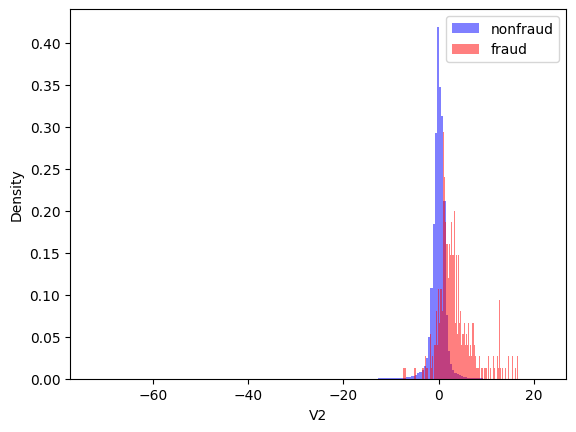

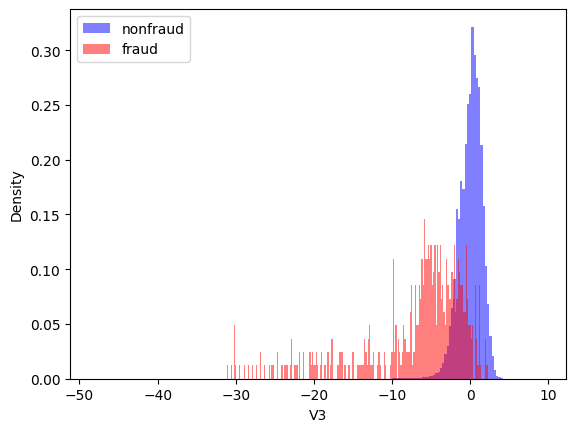

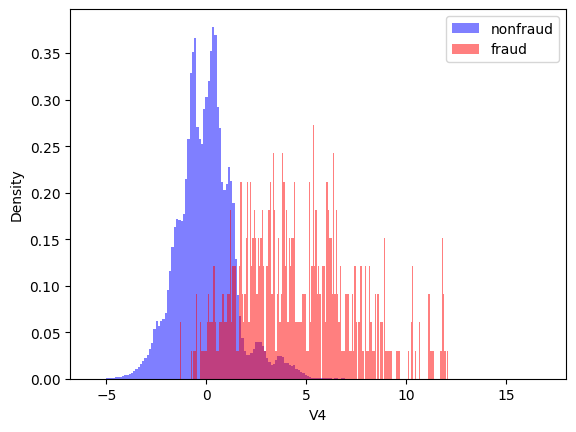

<ipython-input-37-e06e517aad1f>:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  fraud_size = quad(lambda x: np.interp(x, bins1[:-1], density1), -np.inf, np.inf)[0]


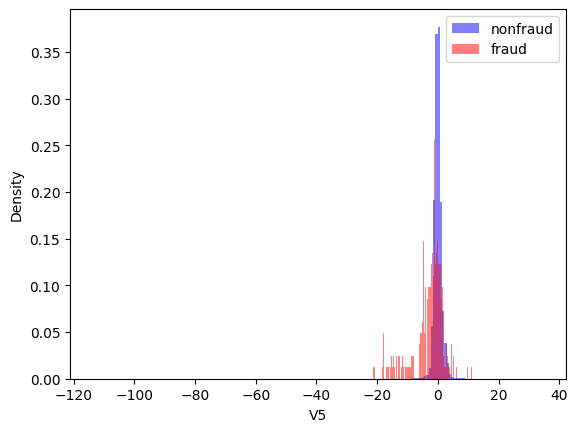

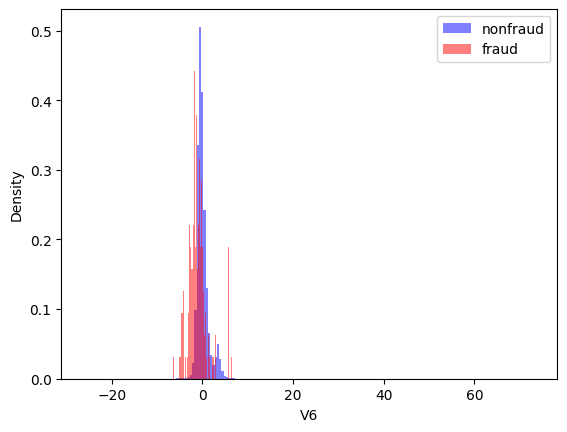

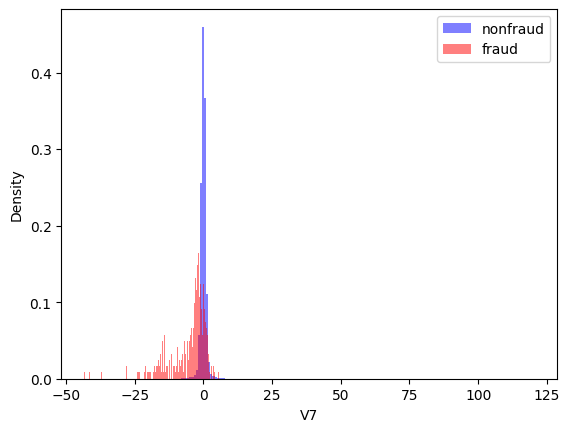

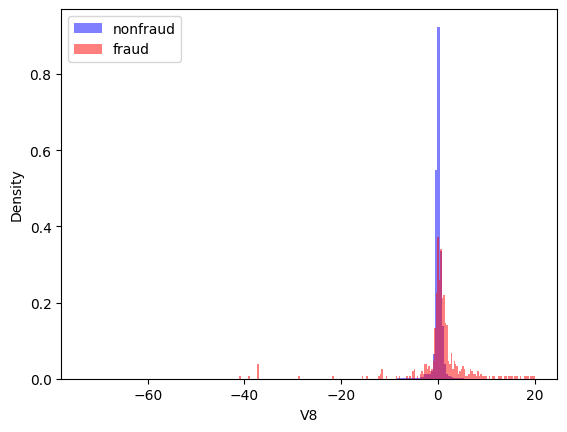

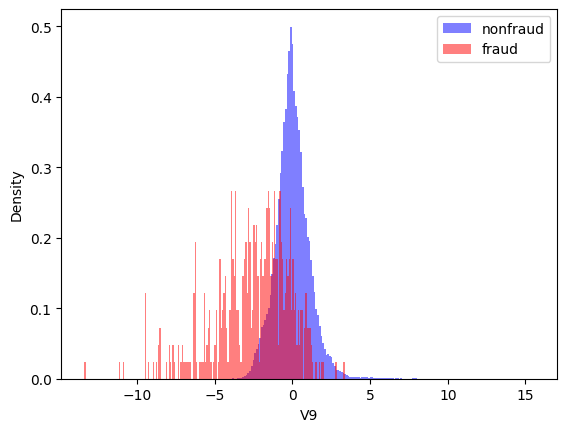

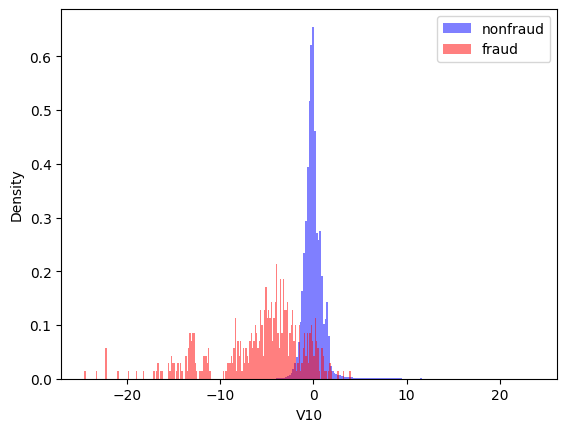

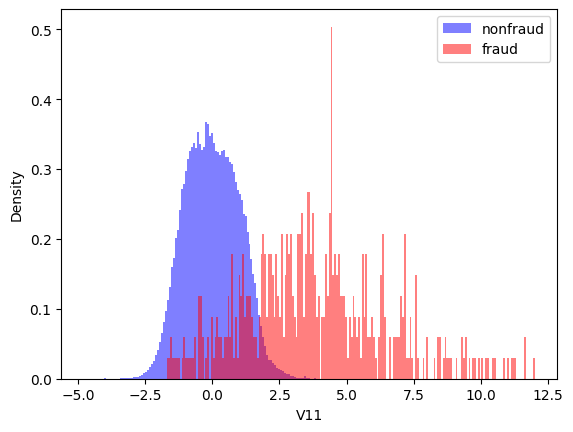

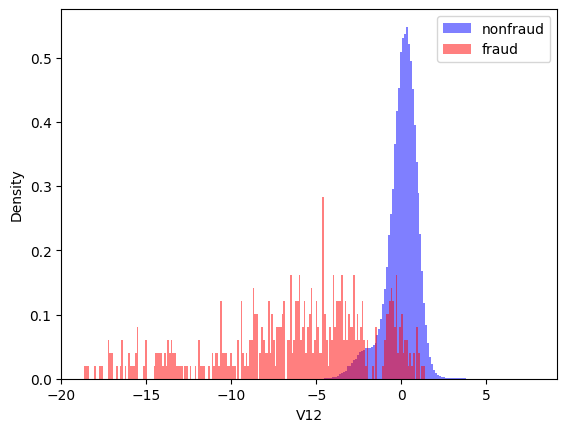

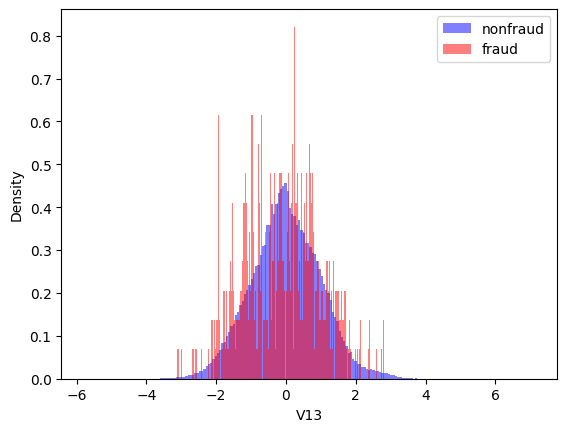

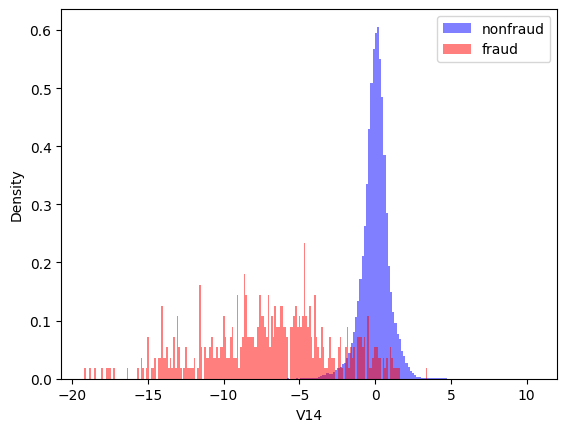

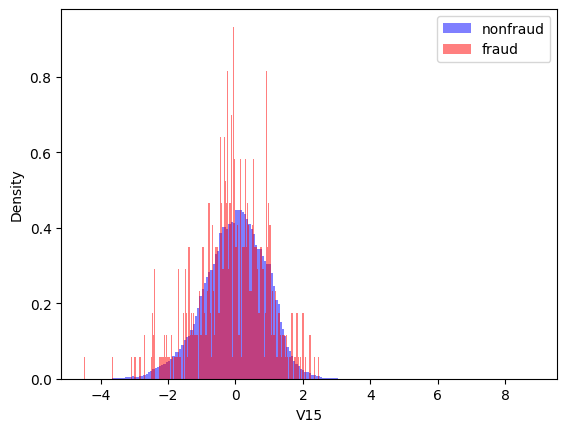

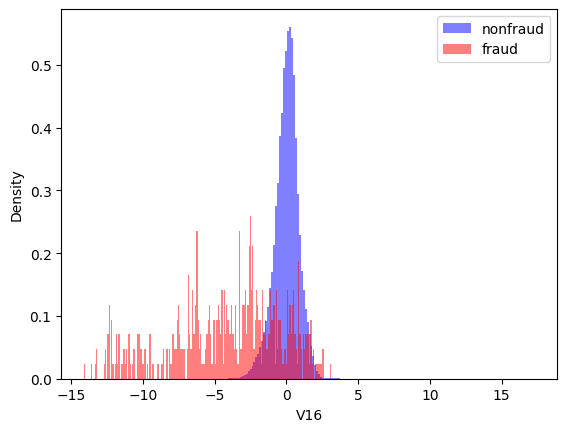

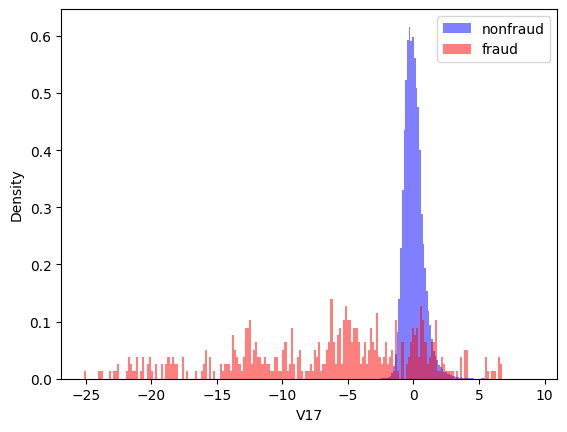

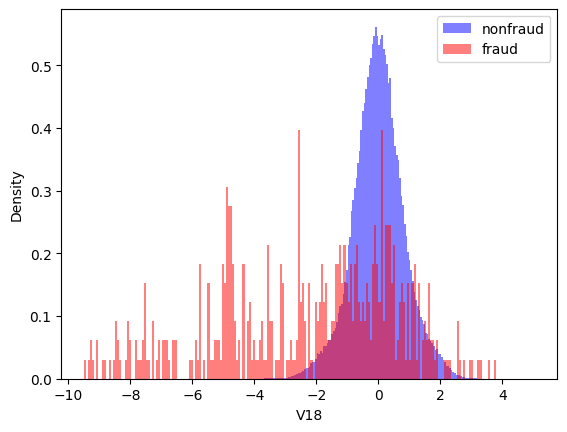

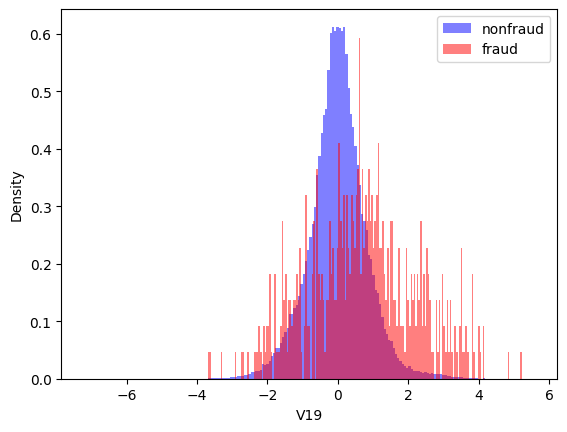

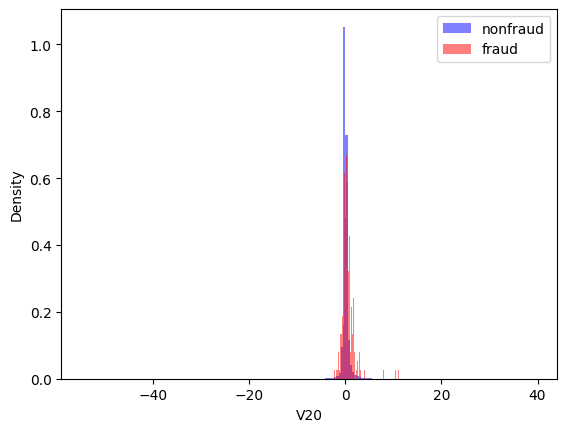

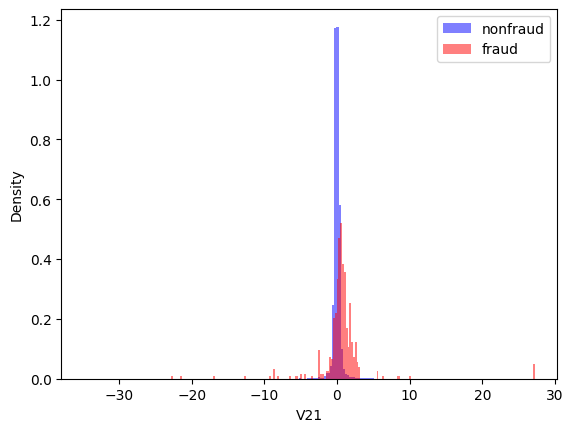

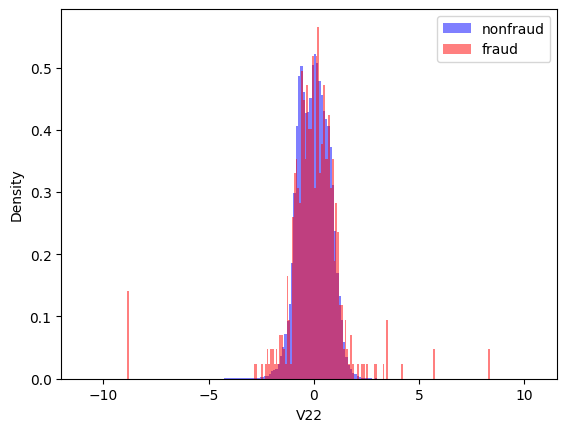

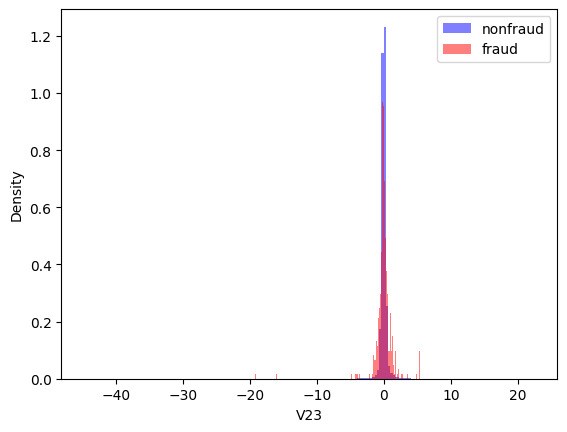

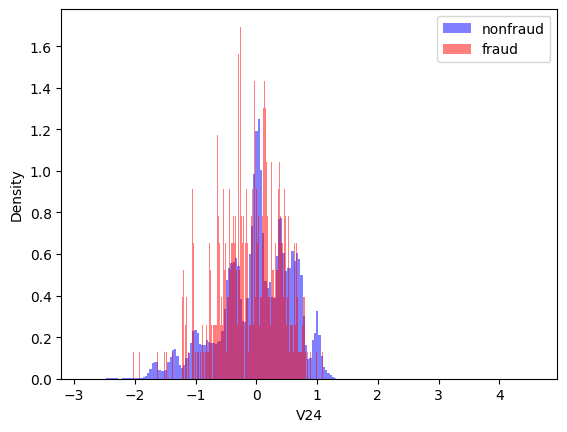

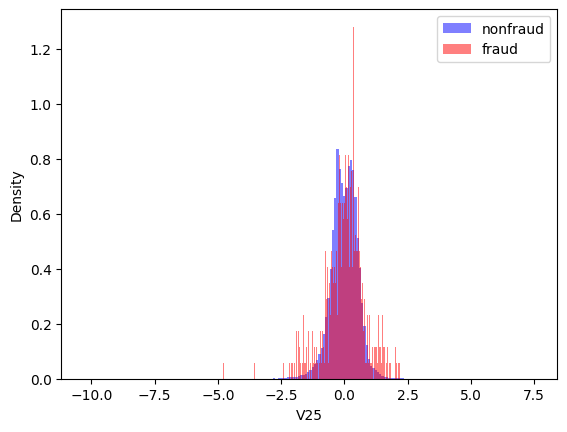

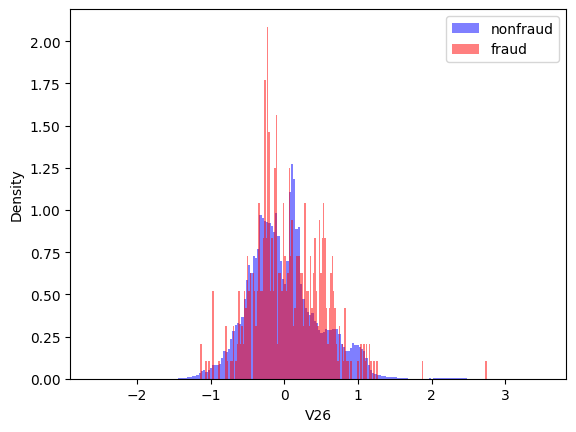

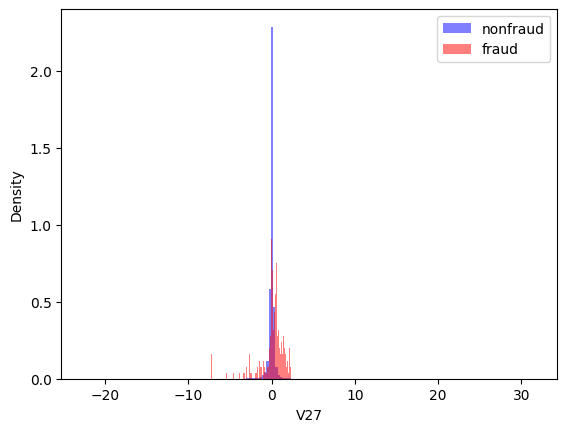

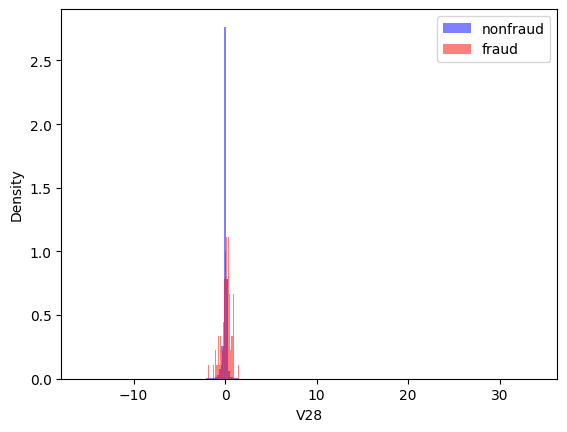

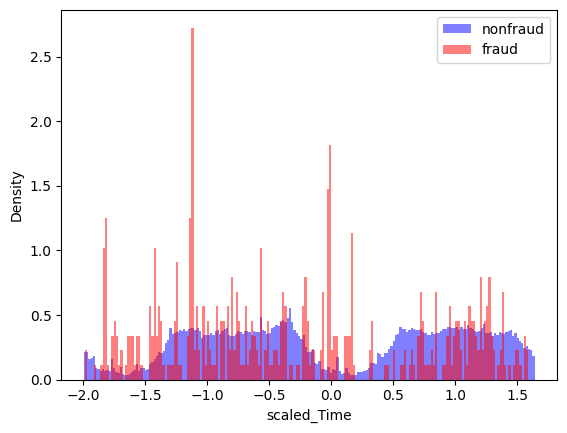

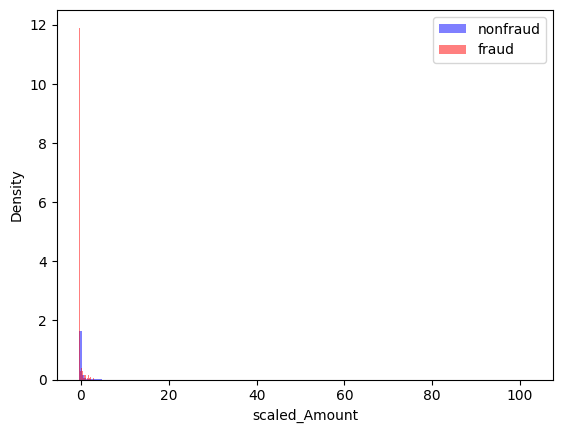

List in order of large difference in distribution between fraudulent and non-fraudulent transactions: [28 25 27 23 20 12 18  3 17 11  6 15 13  9 16 10  1  2  8  0  7 19  5 22
  4 24 14 26 21 29]


In [ ]:
#X_3 (distribution-based feature selection)
#selected 17 features with significant differences in the variances of the probability density functions for each class.

import matplotlib.pyplot as plt
from scipy.integrate import quad, simps, romberg

nonfraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

non_overlap_list = []

# Graph the distribution density of independent variables
for variable in X_copy:
    # Calculate the distribution density of labels 0 and 1
    density0, bins0, _ = plt.hist(nonfraud[variable], bins=200, density=True, alpha=0.5, color='blue', label='nonfraud')
    density1, bins1, _ = plt.hist(fraud[variable], bins=200, density=True, alpha=0.5, color='red', label='fraud')

    # Graph Settings
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Calculate the size of the overlapping area
    overlap_size = quad(lambda x: np.minimum(np.interp(x, bins0[:-1], density0), np.interp(x, bins1[:-1], density1)), -np.inf, np.inf, limit=200)[0]

    # Calculate the size of the entire area
    nonfraud_size = quad(lambda x: np.interp(x, bins0[:-1], density0), -np.inf, np.inf)[0]
    fraud_size = quad(lambda x: np.interp(x, bins1[:-1], density1), -np.inf, np.inf)[0]
    total_size = nonfraud_size + fraud_size - overlap_size

    # Add non-overlapping area size to list
    non_overlap_size = total_size - overlap_size
    non_overlap_list.append(non_overlap_size)

# Get indexes that sort variables in order of large non-overlapping areas
variable_order = np.argsort(non_overlap_list)[::-1]
print(f"List in order of large difference in distribution between fraudulent and non-fraudulent transactions: {variable_order}")

In [ ]:
X_3 = X_copy[['scaled_Time', 'V26', 'V28', 'V24', 'V21', 'V13', 'V19', 'V4', 'V18', 'V12', 'V7', 'V16', 'V14', 'V10', 'V17', 'V11', 'V2']]

In [ ]:
#X_4 (Mutual information-based feature selection)
# calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable. 

from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=17)

X_new = selector.fit_transform(X_copy, y)

selected_features = selector.get_support(indices=True)

print(X_copy.columns[selected_features])

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V21', 'V27'],
      dtype='object')


In [ ]:
X_4 = X_copy[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14',
       'V16', 'V17', 'V18', 'V21', 'V27']]

Modeling

In [ ]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression

Showing that oversampling before data segmentation , which often occurs as a false example of resampling, can lead to overfitting.

In [ ]:
#oversampleing
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

#Split to training, test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

# LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

AUPRC: 0.9894910760445799
Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     85045
           1       0.97      0.92      0.94     85544

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



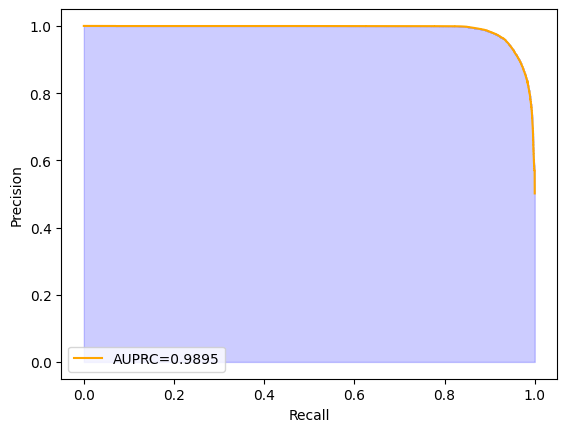

In [ ]:
# classification_report, AUPRC 
report = classification_report(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
auprc = auc(recall, precision)

print(f'AUPRC: {auprc}')

#classification_report 
print("Logistic Regression:\n", classification_report(y_test, y_pred))

# AUPRC graph
plt.plot(recall, precision, color='orange', label=f'AUPRC={auprc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.legend()
plt.show()

In [ ]:
# High performance but it is overfitting.

**Resampling method 1:** Resampling only the training set using k-fold cross-validation and keeping the validation set intact

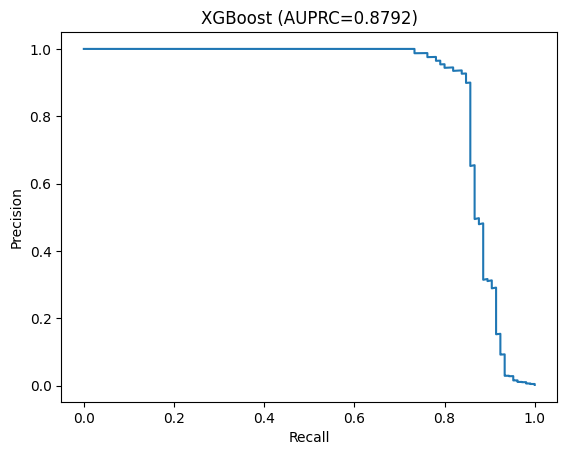

Classification report for the last fold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.71      0.86      0.78       105

    accuracy                           1.00     56961
   macro avg       0.85      0.93      0.89     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from sklearn.model_selection import KFold


# Initialize SMOTE
oversample = SMOTE(sampling_strategy=0.5)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost model
model = XGBClassifier()

# Initialize empty lists to store the performance metrics
auprc_scores = []
class_reports = []

# Loop through each fold and perform the oversampling and model building
for train_idx, test_idx in kf.split(X, y):
    # Split data into train and test sets
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

    # Perform SMOTE oversampling on the training set
    X_over, y_over = oversample.fit_resample(X_train, y_train)

    # Fit the XGBoost model
    model.fit(X_over, y_over)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

     # Compute the evaluation metrics
    scores = precision_recall_fscore_support(y_val_fold, y_pred_fold, average='binary')
    pr_curve = precision_recall_curve(y_val_fold, y_prob_fold)
    auprc = np.trapz(pr_curve[0], pr_curve[1])

    # Calculate AUPRC
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    auprc = auc(recall, precision)
    auprc_scores.append(auprc)

    # Calculate classification report
    class_report = classification_report(y_test, y_pred)
    class_reports.append(class_report)

# Print the mean AUPRC score across all folds
# print(f'Mean AUPRC score: {sum(auprc_scores) / len(auprc_scores):.4f}') #Performance average of models obtained through cross-validation

# Plot the precision-recall curve with the mean AUPRC score
mean_precision, mean_recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
mean_auprc = auc(mean_recall, mean_precision)
plt.plot(mean_recall, mean_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={mean_auprc:.4f})') #AUPRC Score for Models Learned with Full Dataset
plt.show()

# Print the classification report for the last fold
print('Classification report for the last fold:')
print(class_reports[-1])



In [ ]:
# splitting the dataset into training and test sets from the outset, and then applying oversampling and undersampling techniques to the training set to address class imbalance.

**Resampling method 2:** splitting the dataset into training and test sets from the outset, and then applying oversampling and undersampling techniques to the training set to address class imbalance.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, average_precision_score



**Feature selection methods:** compared the precision and recall of models trained using each of the four feature selection methods. 

1.principal component analysis (PCA) based on main component contribution

2.analysis of variance (ANOVA) F-test 

3.distribution-based feature selection 

4.mutual information-based feature selection. 

In [ ]:
# feature selection (4type)

#X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.2, random_state=42)

# using total feature
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [ ]:
# SMOTE oversampling
oversample = SMOTE(sampling_strategy=0.2, random_state=42)
X_over, y_over = oversample.fit_resample(X_train, y_train)


# Random Undersamping
undersample = RandomUnderSampler(sampling_strategy=0.4, random_state=42)
X_under, y_under = undersample.fit_resample(X_over, y_over)



In [ ]:
# Check Class Ratio
print("Original class distribution:\n", y.value_counts())
print("\nAfter oversampling:\n", y_over.value_counts())
print("\nAfter undersampling:\n", y_under.value_counts())
print("\nTest set after oversampling:\n", y_test.value_counts())

Original class distribution:
 0    284315
1       492
Name: Class, dtype: int64

After oversampling:
 0    227451
1     45490
Name: Class, dtype: int64

After undersampling:
 0    113725
1     45490
Name: Class, dtype: int64

Test set after oversampling:
 0    56864
1       98
Name: Class, dtype: int64


XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.83      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



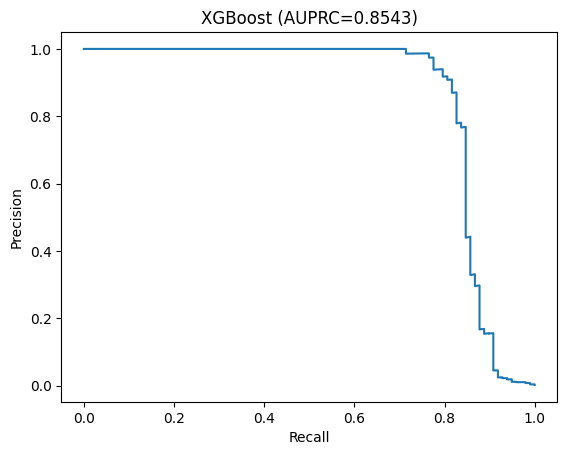

AUPRC_XGBoost:
 0.8543068117118154


In [ ]:
#X_1 (after oversample)
import xgboost as xgb

# xgboost 
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_over, y_over)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

# AUPRC 
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auprc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={auprc_xgb:.4f})')
plt.show()
print("AUPRC_XGBoost:\n", auprc_xgb )

XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.66      0.86      0.74        98

    accuracy                           1.00     56962
   macro avg       0.83      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962



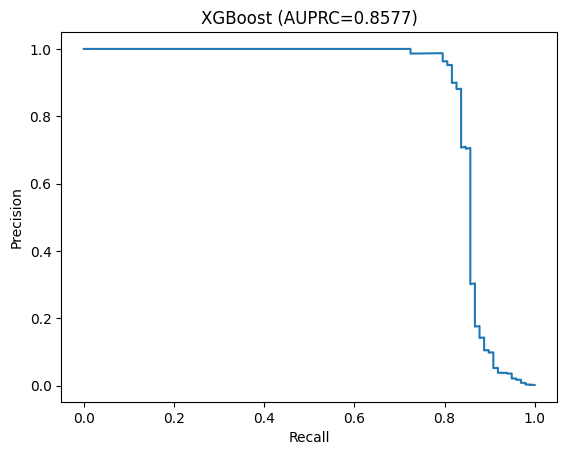

AUPRC_XGBoost:
 0.8576695966608251


In [ ]:
#X_1 (after undersample)
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_under, y_under)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auprc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={auprc_xgb:.4f})')
plt.show()
print("AUPRC_XGBoost:\n", auprc_xgb )

XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.85      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



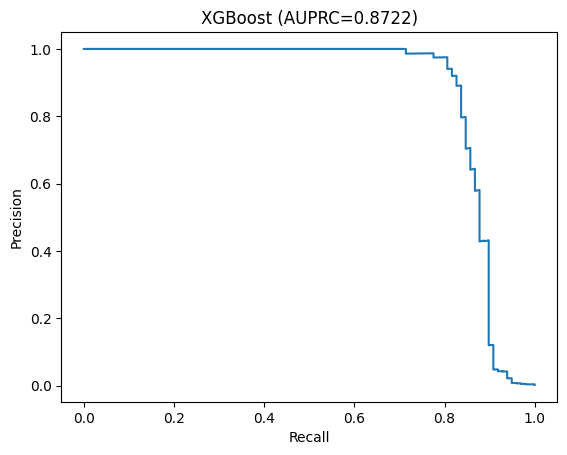

AUPRC_XGBoost:
 0.8722143490664691


In [ ]:
#X_2 (after oversample)
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_over, y_over)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auprc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={auprc_xgb:.4f})')
plt.show()
print("AUPRC_XGBoost:\n", auprc_xgb )

XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.87      0.71        98

    accuracy                           1.00     56962
   macro avg       0.80      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962



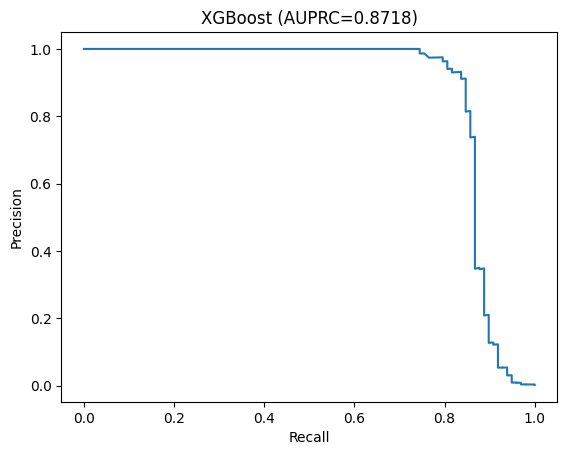

AUPRC_XGBoost:
 0.8718075065315325


In [ ]:
#X_2 (after undersample)
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_under, y_under)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auprc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={auprc_xgb:.4f})')
plt.show()
print("AUPRC_XGBoost:\n", auprc_xgb )

XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.88      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962



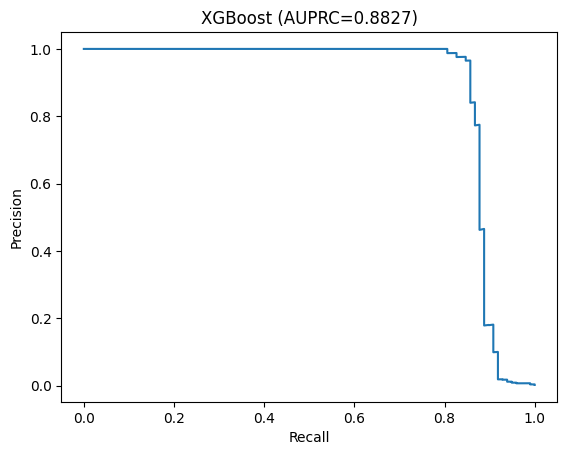

AUPRC_XGBoost:
 0.8827366186403127


In [ ]:
#X_3 (after oversample)
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_over, y_over)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auprc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={auprc_xgb:.4f})')
plt.show()
print("AUPRC_XGBoost:\n", auprc_xgb )

XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.89      0.73        98

    accuracy                           1.00     56962
   macro avg       0.81      0.94      0.87     56962
weighted avg       1.00      1.00      1.00     56962



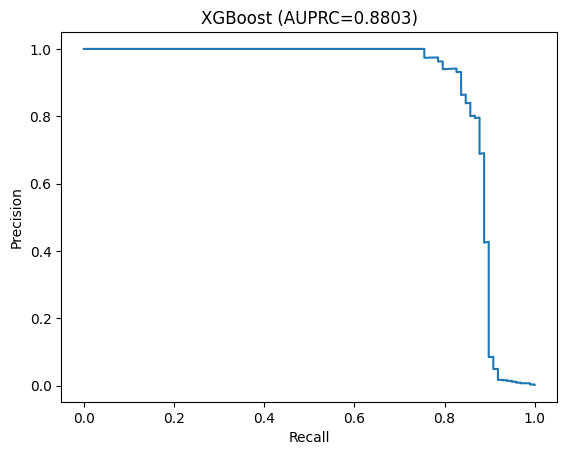

AUPRC_XGBoost:
 0.8803003532068318


In [ ]:
#X_3 (after undersample)
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_under, y_under)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auprc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={auprc_xgb:.4f})')
plt.show()
print("AUPRC_XGBoost:\n", auprc_xgb )

XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.85      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



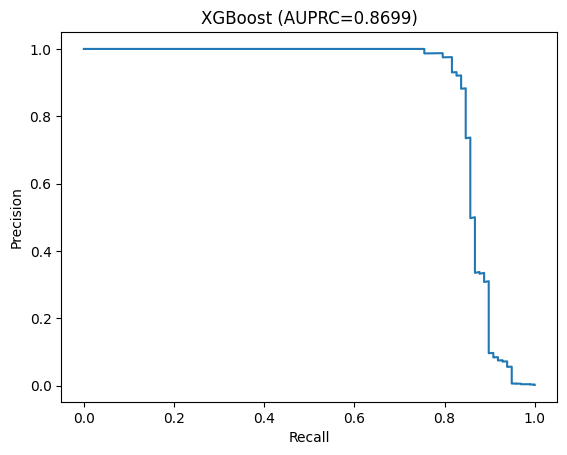

AUPRC_XGBoost:
 0.8698813181657451


In [ ]:
#X_4 (after oversample)
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_over, y_over)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auprc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={auprc_xgb:.4f})')
plt.show()
print("AUPRC_XGBoost:\n", auprc_xgb )

XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.87      0.74        98

    accuracy                           1.00     56962
   macro avg       0.82      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962



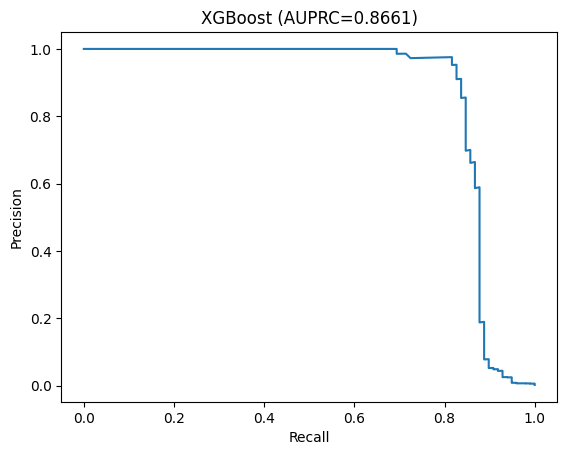

AUPRC_XGBoost:
 0.8660935545210098


In [ ]:
#X_4 (after undersample)
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_under, y_under)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auprc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={auprc_xgb:.4f})')
plt.show()
print("AUPRC_XGBoost:\n", auprc_xgb )

XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.86      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962



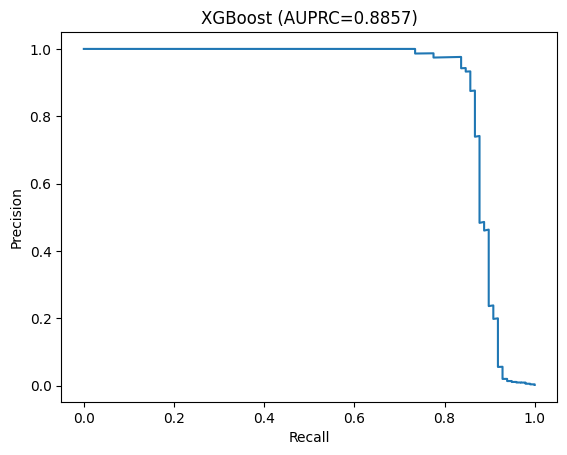

AUPRC_XGBoost:
 0.885685523630603


In [ ]:
#X (using all feature)
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_over, y_over)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auprc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={auprc_xgb:.4f})')
plt.show()
print("AUPRC_XGBoost:\n", auprc_xgb )

**Ensemble models:** compared the XGBoost with logistic regression, random forests, support vector machines, and their ensemble using best-selected model.

In [ ]:
# Weak classifiers for ensemble models
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(max_depth=4)
clf3 = svm.SVC(probability=True)

# Ensemble Model Definition
ensemble = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),('sv', clf3)], voting='soft')

# Model Learning
clf1.fit(X_over, y_over)
clf2.fit(X_over, y_over)
clf3.fit(X_over, y_over)
ensemble.fit(X_over, y_over)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(max_depth=4)),
                             ('sv', SVC(probability=True))],
                 voting='soft')

AUPRC_Logistic Regression:
 0.7630372036453106
AUPRC_Random Forest:
 0.7503787845963454
AUPRC_Support vector machine:
 0.7681035741804458
AUPRC_Ensemble:
 0.7932109262827477
Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.88      0.33        98

    accuracy                           0.99     56962
   macro avg       0.60      0.94      0.67     56962
weighted avg       1.00      0.99      1.00     56962

Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.87      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Support vector machine:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864


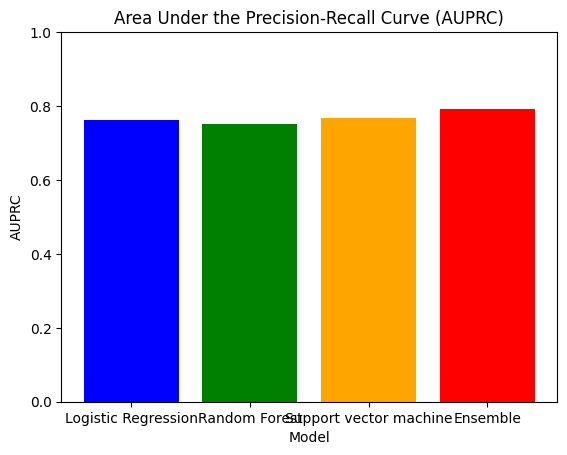

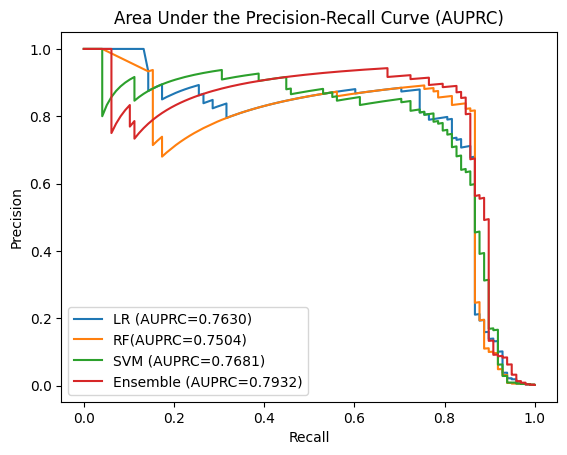

In [ ]:
# Evaluate with test data
y_pred_clf1 = clf1.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)
y_pred_clf3 = clf3.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# precision_recall_curve
precision1, recall1, _ = precision_recall_curve(y_test, clf1.predict_proba(X_test)[:, 1])
auprc1 = auc(recall1, precision1)

precision2, recall2, _ = precision_recall_curve(y_test, clf2.predict_proba(X_test)[:, 1])
auprc2 = auc(recall2, precision2)

precision3, recall3, _ = precision_recall_curve(y_test, clf3.predict_proba(X_test)[:, 1])
auprc3 = auc(recall3, precision3)

precision_en, recall_en, _ = precision_recall_curve(y_test, ensemble.predict_proba(X_test)[:, 1])
auprc_en = auc(recall_en, precision_en)

print("AUPRC_Logistic Regression:\n", auprc1 )
print("AUPRC_Random Forest:\n", auprc2 )
print("AUPRC_Support vector machine:\n", auprc3 )
print("AUPRC_Ensemble:\n", auprc_en)

#classification_report 
print("Logistic Regression:\n", classification_report(y_test, y_pred_clf1))
print("Random Forest:\n", classification_report(y_test, y_pred_clf2))
print("Support vector machine:\n", classification_report(y_test, y_pred_clf3))
print("Ensemble:\n", classification_report(y_test, y_pred_ensemble))

# AUPRC 
plt.bar(['Logistic Regression', 'Random Forest', 'Support vector machine', 'Ensemble'], [auprc1, auprc2, auprc3, auprc_en], color=['blue', 'green', 'orange','red'])
plt.xlabel('Model')
plt.ylabel('AUPRC')
plt.ylim([0, 1])
plt.title('Area Under the Precision-Recall Curve (AUPRC)')
plt.show()

# AUPRC graph
plt.plot(recall1, precision1, label=f'LR (AUPRC={auprc1:.4f})')
plt.plot(recall2, precision2, label=f'RF(AUPRC={auprc2:.4f})')
plt.plot(recall3, precision3, label=f'SVM (AUPRC={auprc3:.4f})')
plt.plot(recall_en, precision_en, label=f'Ensemble (AUPRC={auprc_en:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Area Under the Precision-Recall Curve (AUPRC)')
plt.show()

Ensemble models have the advantage of combining the prediction results of individual models to make better predictions, but if the performance of individual models is low, the performance of the entire ensemble model can also be degraded. Moreover, Ensemble models are made by combining multiple models, so the computational cost is higher. In particular, large datasets can take a very long time to calculate.

**Hyperparameter tuning**


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Best parameters: {'learning_rate': 0.1, 'max_depth': 3}
Best cross-validation average precision: nan
XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.46      0.89      0.60        98

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.00      1.00     56962



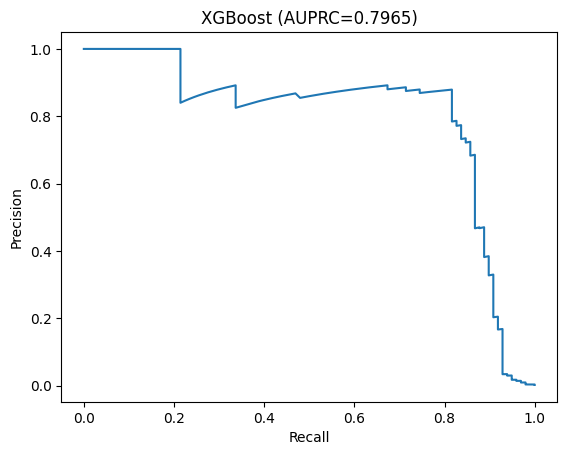

AUPRC_XGBoost:
 0.7965060608879466


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, auc, make_scorer

# Specifies the parameter values to tune
param_grid = {
    'max_depth': [3, 5],
    'n_estimators': [50, 100, 150],
    #'learning_rate': [0.1, 0.05]
}

# XGBoost 
xgb_clf = xgb.XGBClassifier()

# make auprc function to use score for grid search model
def auprc(y_true, y_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_proba[:, 1])
    return auc(recall, precision)

auprc_score = make_scorer(auprc, greater_is_better=True, needs_proba=True)

# GridSearchCV 
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring=auprc_score, n_jobs=-1)

# model learing
grid_search.fit(X_over, y_over)

# Outputs optimal hyperparameters and scores.
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation average precision: {grid_search.best_score_}")

# Perform predictions with tuned models.
y_pred_xgb = grid_search.predict(X_test)

# classification_report
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

# AUPRC 
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
auprc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={auprc_xgb:.4f})')
plt.show()
print("AUPRC_XGBoost:\n", auprc_xgb)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7}
Best cross-validation average precision: 0.9940342347155543
XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.85      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962



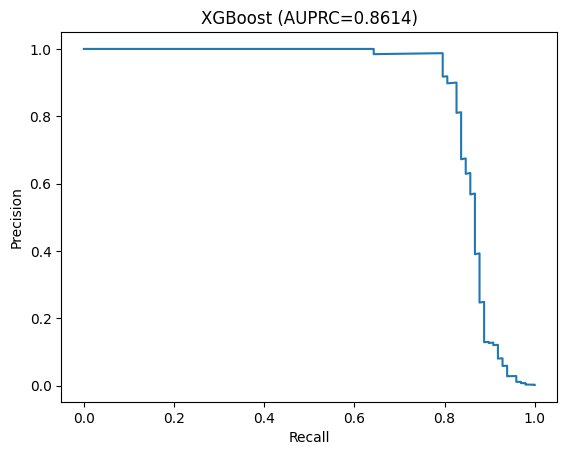

AUPRC_XGBoost:
 0.8614439404081767


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score


param_grid = {
    'max_depth': [3, 5, 7],
    #'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05]
}


xgb_clf = xgb.XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_under, y_under)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation average f1: {grid_search.best_score_}")

y_pred_xgb = grid_search.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
auprc_xgb = auc(recall_xgb, precision_xgb)
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'XGBoost (AUPRC={auprc_xgb:.4f})')
plt.show()
print("AUPRC_XGBoost:\n", auprc_xgb)

Hyperparameter tuning can have a significant impact on the performance of the model, but may not be effective for models with few hyperparameters or with proper defaults. In addition, selecting hyperparameters based on a validation data set can result in models optimized only for that data set, which can degrade the generalization performance of the new data set.
Therefore, the need for hyperparameter adjustment depends on the structure of the model and the characteristics of the dataset, and in some cases, the defaults can actually yield better performance. In this regard, I selected a model that omitted hyperparameter tuning, and the result of hyperparameter tuning for this model was not better than the default value. Therefore, I decided that it would be appropriate to use the default values for the hyperparameters of this model.

**Results and Findings:**

The results of this study suggest that the second method about resampling, which involves explicit separation of the test set and resampling only the training set, is more effective in improving the model's performance. This approach not only prevents data leakage, but also provides a more robust evaluation of the model's generalization ability. Therefore, I recommend this approach for future studies that involve resampling techniques to address class imbalance.

Moreover, the research demonstrates that distribution-based feature selection outperforms other methods in terms of positive discrimination model performance. In distribution-based feature selection, I selected features by examining their distributions and comparing the distributions of the positive and negative classes. I selected features with significant differences in the variances of the probability density functions for each class.

In summary, our optimized model extracted features using distribution-based feature selection, explicitly separated the test set, oversampled only the training set, and utilized XGBoost. This model achieved high AUPRC score of 88.27%, precision of 77%, recall of 88%, and F1 score of 82%, proving to be effective in preventing financial losses. I tested the generalization performance by using original data that was not exposed to training or resampling.

Using all 30 linearly independent and unrelated variables in the same model resulted in an AUPRC score of 88.57%, precision of 88%, recall of 86%, and F1 score of 87%. Despite increasing the number of variables by almost double and increasing complexity, the fraud detection performance was weakened by a 2% decrease in recall score, which is in trade-off relationship with precision.

However, depending on the purpose of use, it may be worth considering allowing slight overfitting to increase precision in order to reduce false positives for normal customers and minimize unnecessary customer inconvenience.

Furthermore, data exploration revealed that fraudulent transactions were more prevalent during off-hours, such as late at night or early in the morning, and that they typically involved smaller transaction amounts. The practical application of this model involves financial institutions using it to detect fraudulent transactions and prevent financial losses.
